REGRESION LOGISTICA

Olga Yamile Neme Castro

In [1]:
pip install numpy pandas scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
Datos = pd.read_csv('C:/Users/daveg/Desktop/heart_cleveland_upload.csv')

In [5]:
Datos.head(30)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [13]:
Datos = Datos.rename(columns={'age': 'Edad', 'sex': 'Sexo', 'cp': 'Dolor_en_Pecho', 'trestbps': 'Presion_Arterial', 'chol': 'Colesterol', 'fbs': 'Nivel_Azucar', 'restecg': 'Electro', 'thalach': 'Frecuencia_Cardiaca', 'exang': 'Angina', 'oldpeak': 'Depresion_del_ST', 'slope': 'Pendiente', 'ca': 'Num_Vasos', 'thal': 'Talasemia', 'condition': 'Enfermedad_Cardiaca'})
print(Datos)

     Edad  Sexo  Dolor_en_Pecho  Presion_Arterial  Colesterol  Nivel_Azucar  \
0      69     1               0               160         234             1   
1      69     0               0               140         239             0   
2      66     0               0               150         226             0   
3      65     1               0               138         282             1   
4      64     1               0               110         211             0   
..    ...   ...             ...               ...         ...           ...   
292    40     1               3               152         223             0   
293    39     1               3               118         219             0   
294    35     1               3               120         198             0   
295    35     0               3               138         183             0   
296    35     1               3               126         282             0   

     Electro  Frecuencia_Cardiaca  Angina  Depresio

In [15]:
Datos.describe()

,Edad,Sexo,Dolor_en_Pecho,Presion_Arterial,Colesterol,Nivel_Azucar,Electro,Frecuencia_Cardiaca,Angina,Depresion_del_ST,Pendiente,Num_Vasos,Talasemia,Enfermedad_Cardiaca
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Identificacion de datos faltantes y atipicos en Edad')

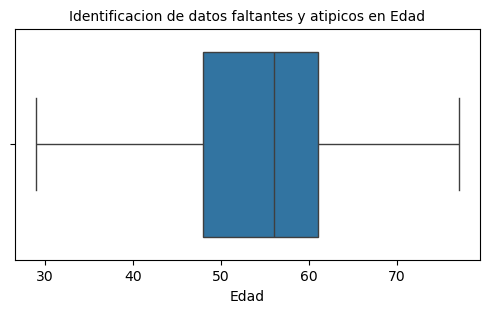

In [31]:
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Edad'])
plt.title('Identificacion de datos faltantes y atipicos en Edad', fontsize=10)

Text(0.5, 1.0, 'Identificacion de datos faltantes y atipicos en Presion Arterial')

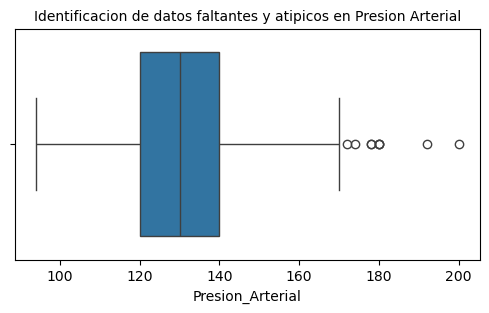

In [23]:
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Presion_Arterial'])
plt.title('Identificacion de datos faltantes y atipicos en Presion Arterial', fontsize=10)

In [37]:
presion_minimo=90
presion_maximo=170
Total_Atipicos=((Datos['Presion_Arterial']<presion_minimo)|(Datos['Presion_Arterial']>presion_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 9


In [41]:
Datos=Datos[(Datos['Presion_Arterial']<presion_maximo)&(Datos['Presion_Arterial']>presion_minimo)]

In [43]:
Total_Atipicos=((Datos['Presion_Arterial']<presion_minimo)|(Datos['Presion_Arterial']>presion_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


Text(0.5, 1.0, 'Identificacion de datos faltantes y atipicos en nivel de Colesterol')

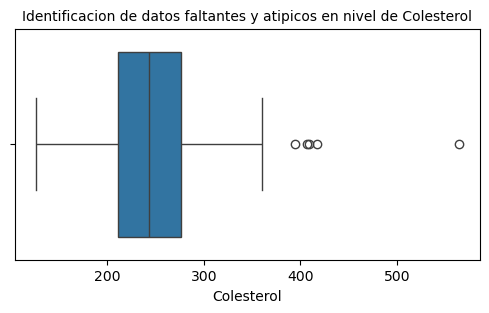

In [25]:
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Colesterol'])
plt.title('Identificacion de datos faltantes y atipicos en nivel de Colesterol', fontsize=10)

In [47]:
colesterol_minimo=40
colesterol_maximo=310
Total_Atipicos=((Datos['Colesterol']<colesterol_minimo)|(Datos['Colesterol']>colesterol_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 25


In [51]:
Datos=Datos[(Datos['Colesterol']<colesterol_maximo)&(Datos['Colesterol']>colesterol_minimo)]

In [53]:
Total_Atipicos=((Datos['Colesterol']<colesterol_minimo)|(Datos['Colesterol']>colesterol_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


Text(0.5, 1.0, 'Identificacion de datos faltantes y atipicos en Frecuencia Cardiaca')

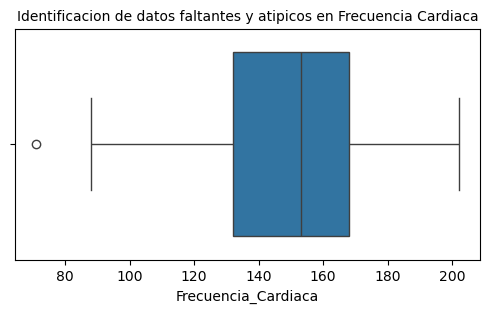

In [55]:
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Frecuencia_Cardiaca'])
plt.title('Identificacion de datos faltantes y atipicos en Frecuencia Cardiaca', fontsize=10)

In [57]:
print("Cantidad de Registros con cero en Edad: ",Datos['Edad'].isin([0]).sum())
print("Cantidad de Registros con cero en Presion Arterial: ",Datos['Presion_Arterial'].isin([0]).sum())
print("Cantidad de Registros con cero en Colesterol: ",Datos['Colesterol'].isin([0]).sum())
print("Cantidad de Registros con cero en Frecuencia Cardiaca: ",Datos['Frecuencia_Cardiaca'].isin([0]).sum())

Cantidad de Registros con cero en Edad:  0
Cantidad de Registros con cero en Presion Arterial:  0
Cantidad de Registros con cero en Colesterol:  0
Cantidad de Registros con cero en Frecuencia Cardiaca:  0


In [59]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 259 entries, 0 to 296
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Edad                 259 non-null    int64  
 1   Sexo                 259 non-null    int64  
 2   Dolor_en_Pecho       259 non-null    int64  
 3   Presion_Arterial     259 non-null    int64  
 4   Colesterol           259 non-null    int64  
 5   Nivel_Azucar         259 non-null    int64  
 6   Electro              259 non-null    int64  
 7   Frecuencia_Cardiaca  259 non-null    int64  
 8   Angina               259 non-null    int64  
 9   Depresion_del_ST     259 non-null    float64
 10  Pendiente            259 non-null    int64  
 11  Num_Vasos            259 non-null    int64  
 12  Talasemia            259 non-null    int64  
 13  Enfermedad_Cardiaca  259 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 30.4 KB


In [61]:
Datos['Enfermedad_Cardiaca'].value_counts()

Enfermedad_Cardiaca
0    144
1    115
Name: count, dtype: int64

In [65]:
X = Datos.drop('Enfermedad_Cardiaca',axis=1)
y = Datos['Enfermedad_Cardiaca']

X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

In [73]:
print (X_train)

     Edad  Sexo  Dolor_en_Pecho  Presion_Arterial  Colesterol  Nivel_Azucar  \
26     66     1               1               160         246             0   
194    61     1               3               138         166             0   
252    53     1               3               123         282             0   
8      60     0               0               150         240             0   
49     50     0               1               120         244             0   
..    ...   ...             ...               ...         ...           ...   
115    53     1               2               130         246             1   
171    65     1               3               135         254             0   
204    60     1               3               130         253             0   
73     71     0               2               110         265             1   
3      65     1               0               138         282             1   

     Electro  Frecuencia_Cardiaca  Angina  Depresio

In [75]:
print (y_train)

26     1
194    1
252    1
8      0
49     0
      ..
115    0
171    1
204    1
73     0
3      1
Name: Enfermedad_Cardiaca, Length: 194, dtype: int64


In [79]:
modelo_regresion = LogisticRegression(solver = "liblinear")
modelo_regresion.fit (X_train, y_train)

Prediccion = modelo_regresion.predict(X_test)

In [81]:
print (y_test)

272    0
191    0
281    1
233    0
56     0
      ..
258    1
225    1
74     1
212    0
30     0
Name: Enfermedad_Cardiaca, Length: 65, dtype: int64


In [83]:
print (Prediccion)

[0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0
 0 1 1 1 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0]


In [85]:
print(classification_report(y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.79      0.86      0.83        36
           1       0.81      0.72      0.76        29

    accuracy                           0.80        65
   macro avg       0.80      0.79      0.80        65
weighted avg       0.80      0.80      0.80        65



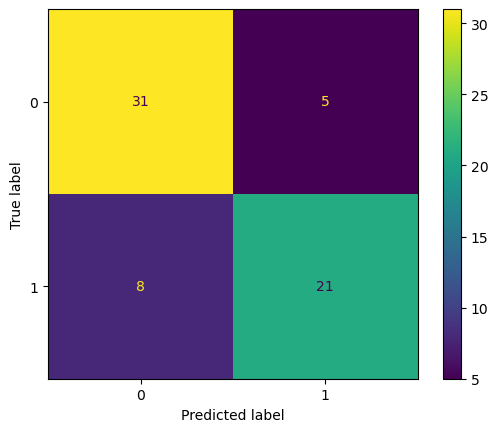

In [87]:
cm=confusion_matrix(y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

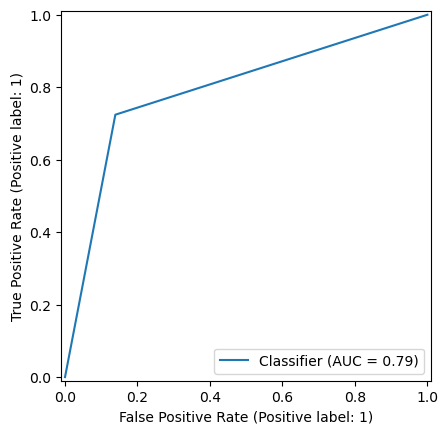

In [89]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, Prediccion)
plt.show()